In [1]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from datetime import datetime
from collections import Counter, OrderedDict
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Declare global variables
gdelt = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)
tweet_volumes = pd.read_csv('C:/Users/Administrator/Dropbox/TWITTER/daily_tweet_volume.csv').sort_values('Dates', ascending=1)
tweet_timestamps = pd.read_csv('C:/Users/Administrator/Dropbox/TWITTER/tweet_timestamps.csv')
dates = sorted([key for key in Counter(gdelt['SQLDATE']).keys()])

In [2]:
time = sorted([datetime.strptime(date, '%a %b %d %H:%M:%S +0000 %Y') for date in list(tweet_timestamps.Timestamp)])
deltas = [(time[i+1] - time[i]).seconds for i in range(len(time)-1)]
gdelt_activity = [len(gdelt.loc[gdelt['SQLDATE'] == date]) for date in dates]
tweet_activity = [np.sum(tweet_volumes.loc[tweet_volumes['Dates'] == date, 'counts']) for date in dates]

# Comparing Events Coverage on GDELT and Twitter

In [3]:
window = 7
ind = np.arange(len(dates)) 
tweet_activity_sma = gdeltxp.movingAverage(tweet_activity, window)
gdelt_activity_sma = gdeltxp.movingAverage(gdelt_activity, window)

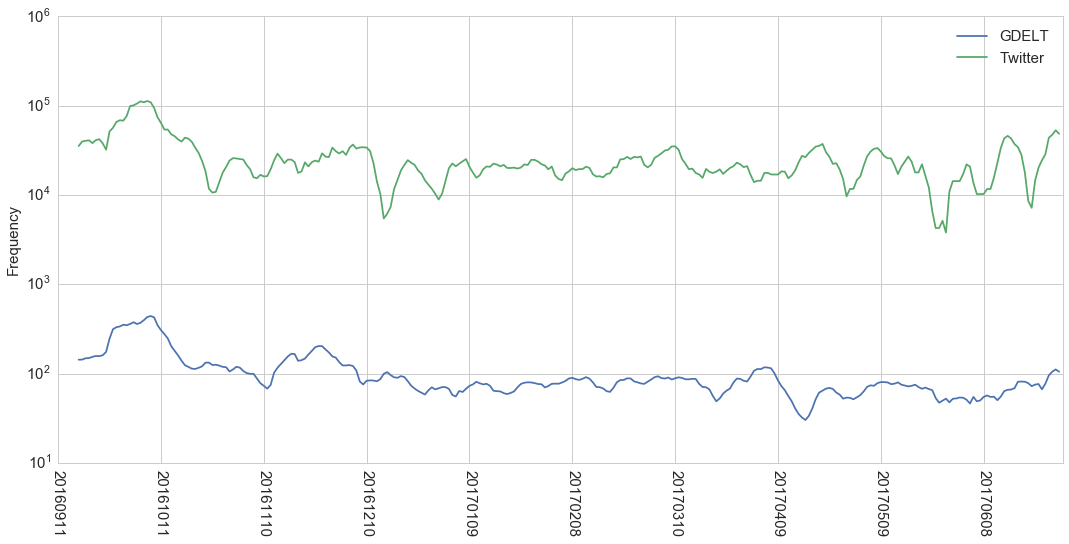

In [4]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequency' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_yscale('log')
plt.xlim([0,len(dates)])
ax.set_xticklabels(dates[::30])
plt.plot(ind[len(gdelt_activity)-len(gdelt_activity_sma):], gdelt_activity_sma, label='GDELT')
plt.plot(ind[len(tweet_activity)-len(tweet_activity_sma):], tweet_activity_sma, label='Twitter')
plt.legend(loc='best', fontsize=15)
plt.show()

# Event Frequency Correlation

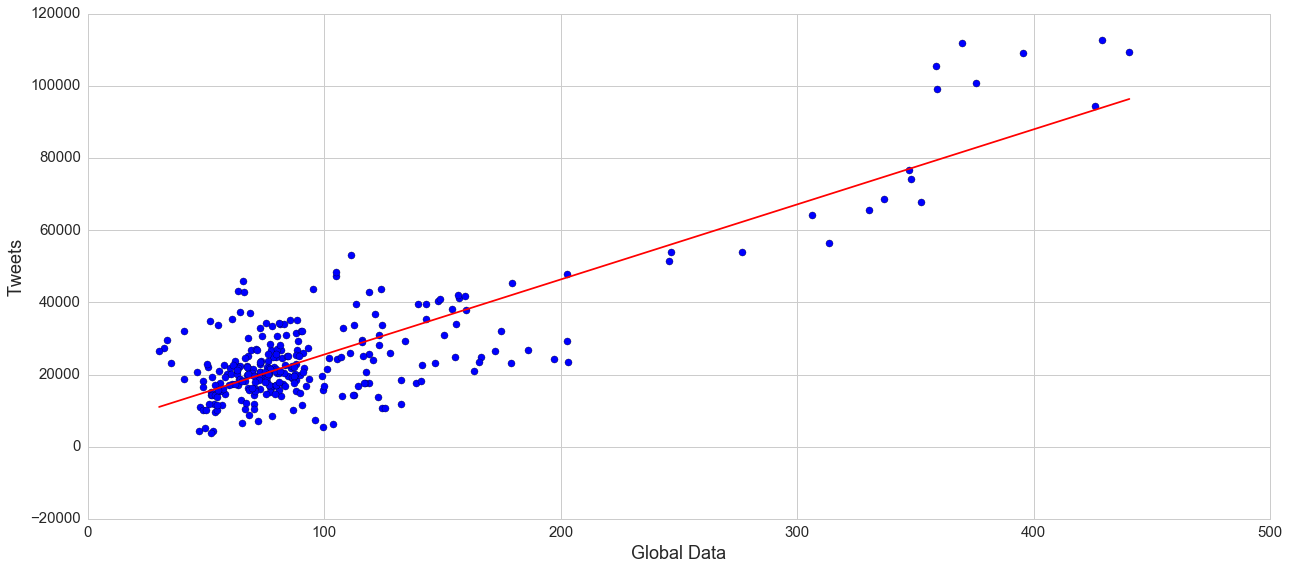

In [5]:
fig, ax = plt.subplots(figsize= (18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
plt.scatter(gdelt_activity_sma,tweet_activity_sma, s=50) #s=120
plt.plot(np.unique(gdelt_activity_sma), np.poly1d(np.polyfit(gdelt_activity_sma, tweet_activity_sma, 1))(np.unique(gdelt_activity_sma)), c='r')
#ax.set_xticks(np.arange(0, 5, 1))
ax.set_xlabel('Global Data', fontsize=18)
ax.set_ylabel('Tweets' , fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.axhline(y=80000, color='k', linestyle='--')
#plt.axhline(y=40000, color='k', linestyle='--')
#plt.axvline(x=475, color='k', linestyle='--')
#plt.axvline(x=355, color='k', linestyle='--')
#plt.axvline(x=225, color='k', linestyle='--')
#plt.axvline(x=100, color='k', linestyle='--')
#ax.set_yscale('log')
plt.tight_layout()
#plt.ylim([0,10e6])
plt.show()

In [6]:
sp.stats.spearmanr(gdelt_activity_sma, tweet_activity_sma)

SpearmanrResult(correlation=0.4849494868612948, pvalue=2.461300250657833e-18)

In [7]:
sp.stats.bartlett(gdelt_activity_sma, tweet_activity_sma)

BartlettResult(statistic=2746.7210513460859, pvalue=0.0)

# Cross Correlation Validation

In [60]:
def cross_correlation(twitter,gdelt,x):
    npts = x
    x = np.linspace(0, 1, npts)
    y1 = twitter
    y2 = gdelt

    lags = np.arange(-npts + 1, npts)
    ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
    ccor = ccov / (npts * y1.std() * y2.std())

    fig, axs = plt.subplots(nrows=2, figsize=(18,8))
    fig.subplots_adjust(hspace=0.4)
    ax = axs[0]
    ax.plot(x, y1, 'b', label='Twitter')
    ax.plot(x, y2, 'r', label='GDELT')
    #ax.set_ylim(-10, 10)
    ax.set_yscale('log')
    ax.legend(loc='best', fontsize='large', ncol=2)

    ax = axs[1]
    ax.plot(lags, ccor)
    ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel('cross-correlation', fontsize=18)
    ax.set_xlabel('lag of Twitter relative to GDELT', fontsize=18)

    maxlag = lags[np.argmax(ccor)]
    print("max correlation is at lag %d" % maxlag)

## Pre-Signing of Peace Agreement

September 11 - September 25: Maximum correlation is at lag 6. Twitter activity is leading news activity. Dominant social media campaigns and buzz about the peace agreements. Identify prominent hashtags and topics during this period.

max correlation is at lag 6


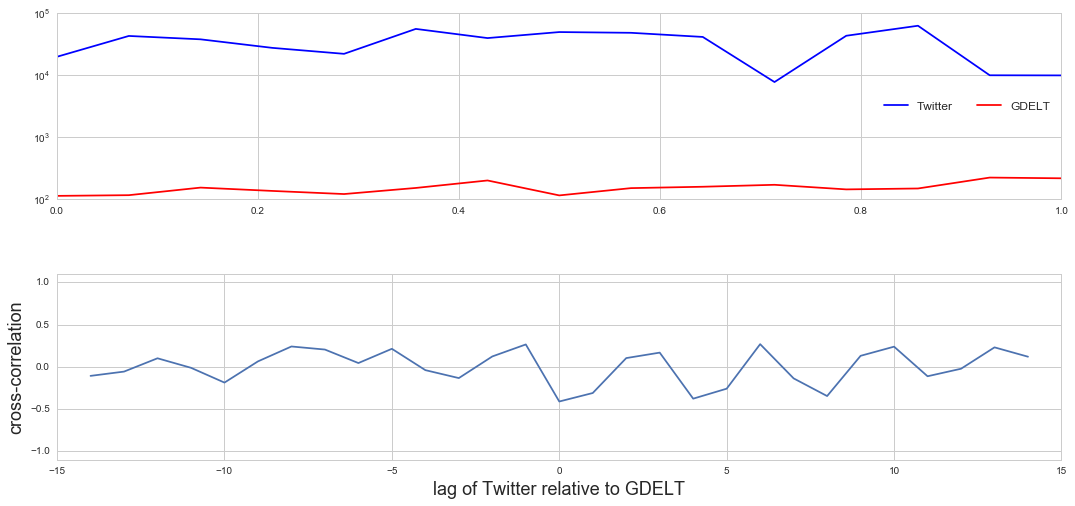

In [61]:
# Pre-Signing of Peace Agreement: September 11 - September 25
cross_correlation(np.array(tweet_activity[:15]), np.array(gdelt_activity[:15]), 15)

## Signing of Peace Agreements

September 22 - September 30: 4 day snapshot before and after signing of peace agreements. Maximum correlation at lag 0. Similar activity signal frequencies between news and social media.

max correlation is at lag 0


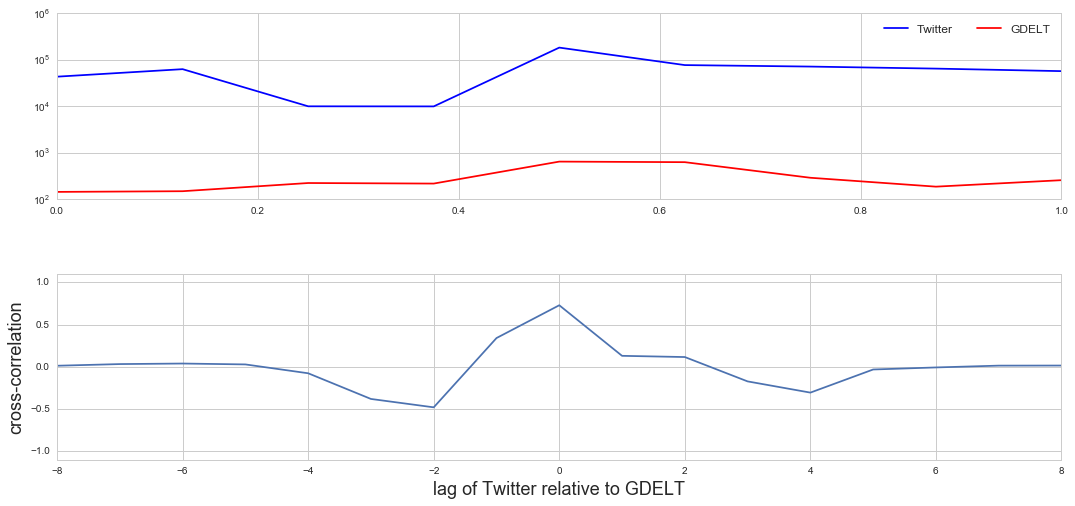

In [62]:
# Signing of Peace Agreement: September 22 - September 30 (t = 09/26, k = +-4)
cross_correlation(np.array(tweet_activity[11:20]), np.array(gdelt_activity[11:20]), 9)

## Plebiscite

September 25 - October 7: 5 day snapshot before and after the national referendum. Maximum correlation at lag -1. News activity is leading Twitter activity. News coverage of the plebiscite ignites public reactions on social media.

max correlation is at lag -1


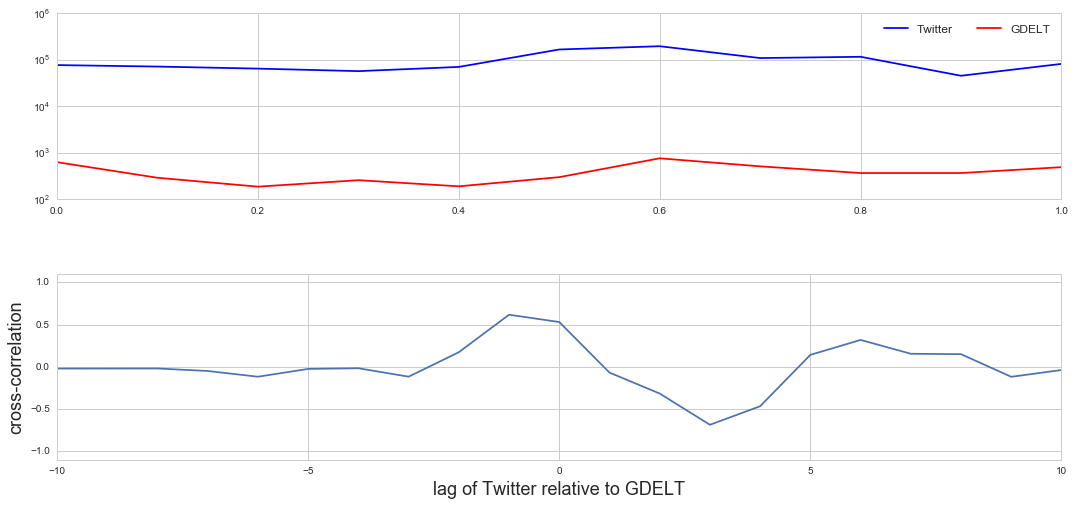

In [67]:
# Referendum Period: September 25 - October 7 (t = 10/02, k = +-5)
cross_correlation(np.array(tweet_activity[16:27]), np.array(gdelt_activity[16:27]), 11)

In [47]:
cross_correlation(np.array(tweet_activity[20:27]), np.array(gdelt_activity[20:27]), 7)

array(70624)

In [34]:
def classify(x,v,y,z):
    gdelt_index = [index for index, value in enumerate(gdelt_activity_sma) if value > x and value < v]
    tweet_index = [index for index, value in enumerate(tweet_activity_sma) if value > y and value <z]
    dual_index = [index for index in gdelt_index if index in tweet_index]
    date_vals = [dates[index] for index in dual_index]

    return date_vals

In [59]:
print(classify(90, 220, 0,60000))

[20160911, 20160912, 20160913, 20160914, 20160915, 20160916, 20160917, 20160918, 20160919, 20161008, 20161009, 20161010, 20161011, 20161012, 20161013, 20161014, 20161015, 20161016, 20161017, 20161018, 20161019, 20161020, 20161021, 20161022, 20161023, 20161024, 20161025, 20161026, 20161027, 20161028, 20161029, 20161030, 20161031, 20161101, 20161107, 20161108, 20161109, 20161110, 20161111, 20161112, 20161113, 20161114, 20161115, 20161116, 20161117, 20161118, 20161119, 20161120, 20161121, 20161122, 20161123, 20161124, 20161125, 20161126, 20161127, 20161128, 20161129, 20161130, 20161201, 20161209, 20161210, 20161211, 20161212, 20161214, 20161215, 20170206, 20170226, 20170227, 20170302, 20170305, 20170326, 20170327, 20170328, 20170329, 20170330, 20170331, 20170401, 20170402, 20170621, 20170622, 20170623, 20170624]


In [79]:
def events_dist(start, end):
    keys = list(Counter(list(gdelt.loc[gdelt['SQLDATE'] <= end].loc[gdelt['SQLDATE'] >= start].EventRootCode)).keys())
    values = list(Counter(list(gdelt.loc[gdelt['SQLDATE'] <= end].loc[gdelt['SQLDATE'] >= start].EventRootCode)).values())
    gdeltviz.pieChart(keys, values)
    

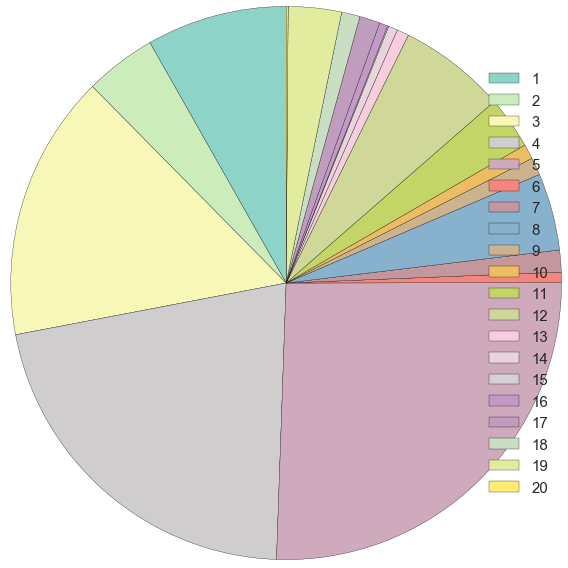

In [93]:
events_dist(20160920, 20161007)

# Cumulative Distribution Function (CDF)

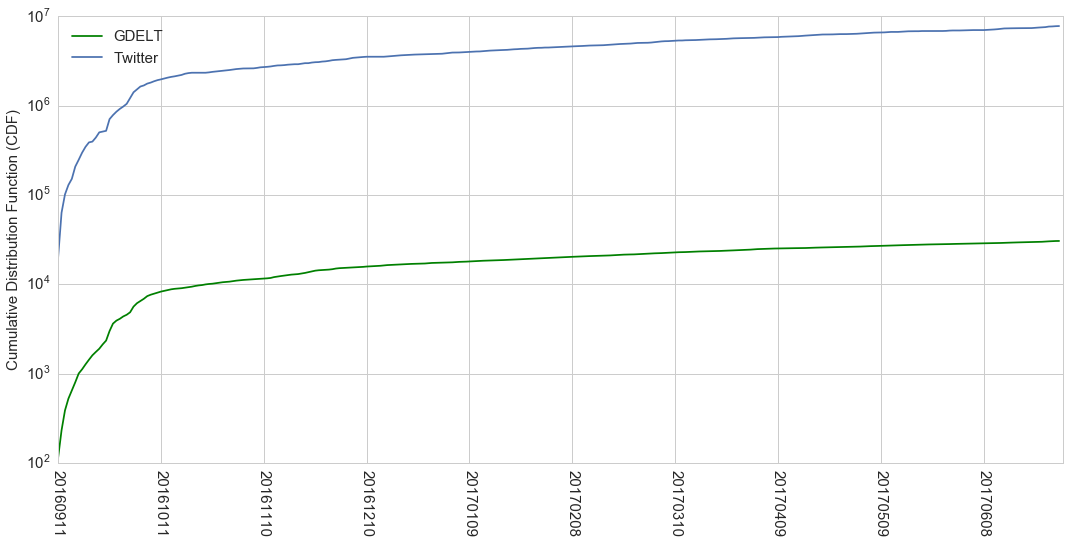

In [8]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Cumulative Distribution Function (CDF)' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_yscale('log')
plt.xlim([0,len(dates)])
ax.set_xticklabels(dates[::30])
plt.plot(ind, np.cumsum(gdelt_activity), label='GDELT', c='g')
plt.plot(ind, np.cumsum(tweet_activity), label='Twitter')
#plt.plot(ind, scaler.fit_transform(np.cumsum(gdelt_activity).reshape(-1,1)), label='GDELT')
#plt.plot(ind, scaler.fit_transform(np.cumsum(tweet_activity).reshape(-1,1)), label='Twitter')
plt.legend(loc='best', fontsize=15)
plt.show()

# Interarrival Time Distribution

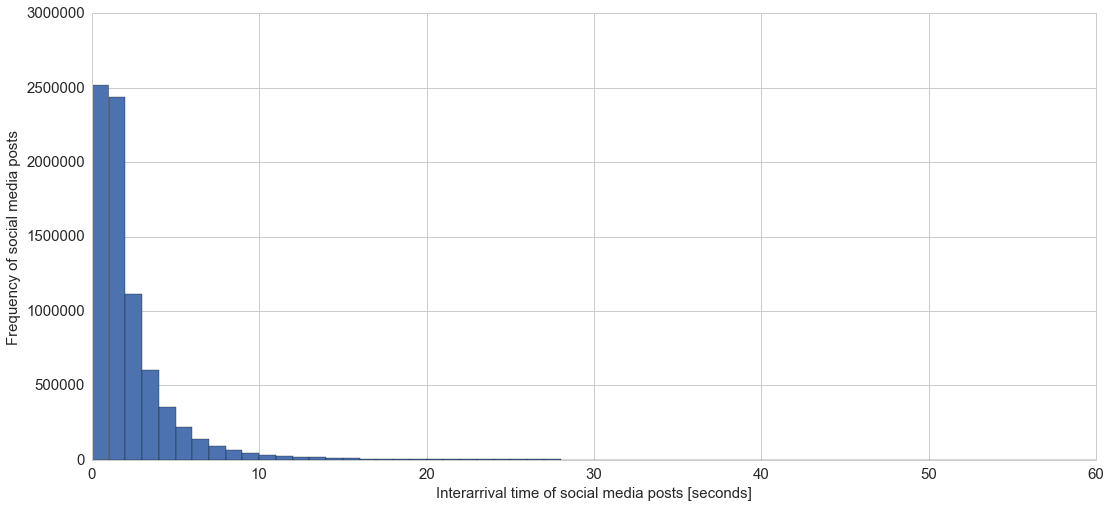

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.hist(deltas, bins=60, range=(0,60), histtype='bar', align='mid', orientation='vertical')
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency of social media posts' , fontsize=15)
ax.set_xlabel('Interarrival time of social media posts [seconds]', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, 70, 10))
plt.xlim([0,60])
plt.show()